In [ ]:
#Importing required packages
import tensorflow as tf
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import glob
from skimage import color
from PIL import Image
from keras.preprocessing import image
from keras.applications.densenet import preprocess_input as preprocess_input_2
from keras.applications.vgg19 import preprocess_input as preprocess_input_1
from keras.applications.resnet import preprocess_input as preprocess_input_0
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import DenseNet121
from keras.preprocessing import image
from tensorflow.keras.models import Model
import pickle
from pickle import load,dump
from time import time
import glob
import shutil
import os
import keras

In [ ]:
#Importing dataset
dataset = {}
dataset['yes'] = []
dataset['no'] = []

In [ ]:
for name in glob.glob('/content/drive/MyDrive/brain_dataset/no/*'):
  dataset['no'].append(name)

In [ ]:
for name in glob.glob('/content/drive/MyDrive/brain_dataset/yes/*'):
  dataset['yes'].append(name)

In [ ]:
print(dataset)

{'yes': ['/content/drive/MyDrive/brain_dataset/yes/Y106.jpg', '/content/drive/MyDrive/brain_dataset/yes/Y1.jpg', '/content/drive/MyDrive/brain_dataset/yes/Y147.JPG', '/content/drive/MyDrive/brain_dataset/yes/Y117.JPG', '/content/drive/MyDrive/brain_dataset/yes/Y113.JPG', '/content/drive/MyDrive/brain_dataset/yes/Y195.JPG', '/content/drive/MyDrive/brain_dataset/yes/Y17.jpg', '/content/drive/MyDrive/brain_dataset/yes/Y166.JPG', '/content/drive/MyDrive/brain_dataset/yes/Y116.JPG', '/content/drive/MyDrive/brain_dataset/yes/Y169.jpg', '/content/drive/MyDrive/brain_dataset/yes/Y194.jpg', '/content/drive/MyDrive/brain_dataset/yes/Y103.jpg', '/content/drive/MyDrive/brain_dataset/yes/Y22.jpg', '/content/drive/MyDrive/brain_dataset/yes/Y184.JPG', '/content/drive/MyDrive/brain_dataset/yes/Y170.JPG', '/content/drive/MyDrive/brain_dataset/yes/Y102.jpg', '/content/drive/MyDrive/brain_dataset/yes/Y157.JPG', '/content/drive/MyDrive/brain_dataset/yes/Y182.JPG', '/content/drive/MyDrive/brain_dataset/yes

In [ ]:
training_images = {}
l_yes = int(len(dataset['yes']) * 0.7)
training_images['yes'] = (dataset['yes'])[:l_yes]

l_no = int(len(dataset['no']) * 0.7)
training_images['no'] = (dataset['no'])[:l_no]

path_of_all_training_img = training_images['no'] + training_images['yes']



In [ ]:
dst_dir = "/content/drive/MyDrive/brain_dataset/train/yes"
for jpgfile in training_images['yes']:
    shutil.copy(jpgfile, dst_dir)

dst_dir = "/content/drive/MyDrive/brain_dataset/train/no"
for jpgfile in training_images['no']:
    shutil.copy(jpgfile, dst_dir)

In [ ]:
testing_images ={}
l1_yes = int(len(dataset['yes']) * 0.9)
testing_images['yes'] = (dataset['yes'])[l_yes:l1_yes]

l1_no = int(len(dataset['no']) * 0.9)
testing_images['no'] = (dataset['no'])[l_no:l1_no]

path_of_all_testing_img = testing_images['yes'] + testing_images['no']



In [ ]:
dst_dir = "/content/drive/MyDrive/brain_dataset/test/yes"
for jpgfile in testing_images['yes']:
    shutil.copy(jpgfile, dst_dir)

dst_dir = "/content/drive/MyDrive/brain_dataset/test/no"
for jpgfile in testing_images['no']:
    shutil.copy(jpgfile, dst_dir)

In [ ]:
validation_images = {}
l2_yes = int(len(dataset['yes']) * 0.9)
validation_images['yes'] = (dataset['yes'])[l1_yes:]

l2_no = int(len(dataset['no']) * 0.9)
validation_images['no'] = (dataset['no'])[l2_no:]

path_of_all_validation_img = validation_images['no'] + validation_images['yes']



In [ ]:
dst_dir = "/content/drive/MyDrive/brain_dataset/validation/yes"
for jpgfile in validation_images['yes']:
    shutil.copy(jpgfile, dst_dir)

dst_dir = "/content/drive/MyDrive/brain_dataset/validation/no"
for jpgfile in validation_images['no']:
    shutil.copy(jpgfile, dst_dir)

In [ ]:

print(len(dataset['yes']))
print(len(dataset['no']))
print(len(training_images['yes']))
print(len(training_images['no']))
print(len(testing_images['yes']))
print(len(testing_images['no']))
print(len(validation_images['yes']))
print(len(validation_images['no']))



155
98
108
68
31
20
16
10


In [ ]:
print(path_of_all_training_img)

['/content/drive/MyDrive/brain_dataset/no/21 no.jpg', '/content/drive/MyDrive/brain_dataset/no/no 4.jpg', '/content/drive/MyDrive/brain_dataset/no/41 no.jpg', '/content/drive/MyDrive/brain_dataset/no/31 no.jpg', '/content/drive/MyDrive/brain_dataset/no/N16.jpg', '/content/drive/MyDrive/brain_dataset/no/2 no.jpeg', '/content/drive/MyDrive/brain_dataset/no/44no.jpg', '/content/drive/MyDrive/brain_dataset/no/no 89.jpg', '/content/drive/MyDrive/brain_dataset/no/10 no.jpg', '/content/drive/MyDrive/brain_dataset/no/No12.jpg', '/content/drive/MyDrive/brain_dataset/no/40 no.jpg', '/content/drive/MyDrive/brain_dataset/no/24 no.jpg', '/content/drive/MyDrive/brain_dataset/no/N20.JPG', '/content/drive/MyDrive/brain_dataset/no/49 no.jpg', '/content/drive/MyDrive/brain_dataset/no/no 8.jpg', '/content/drive/MyDrive/brain_dataset/no/14 no.jpg', '/content/drive/MyDrive/brain_dataset/no/N19.JPG', '/content/drive/MyDrive/brain_dataset/no/N6.jpg', '/content/drive/MyDrive/brain_dataset/no/30 no.jpg', '/con

In [ ]:
import pandas as pd

In [ ]:
#Creating Dataframe
path_of_training_images = pd.Series(path_of_all_training_img)
train_df = pd.DataFrame()

# generate Filename field
train_df['Filename'] = path_of_training_images.map( lambda img_name: img_name.split("/")[-1])


# generate ClassId field
train_df['ClassId'] = path_of_training_images.map(lambda img_name: img_name.split("/")[-2])

train_df

Filename ClassId
0    21 no.jpg      no
1     no 4.jpg      no
2    41 no.jpg      no
3    31 no.jpg      no
4      N16.jpg      no
..         ...     ...
171   Y255.JPG     yes
172    Y32.jpg     yes
173    Y51.jpg     yes
174    Y75.JPG     yes
175    Y85.JPG     yes

[176 rows x 2 columns]

In [ ]:
#Creating Dataframe
path_of_testing_images = pd.Series(path_of_all_testing_img)
test_df = pd.DataFrame()

# generate Filename field
test_df['Filename'] = path_of_testing_images.map( lambda img_name: img_name.split("/")[-1])


# generate ClassId field
test_df['ClassId'] = path_of_testing_images.map(lambda img_name: img_name.split("/")[-2])

test_df

Filename ClassId
0      Y30.jpg     yes
1      Y42.jpg     yes
2      Y92.png     yes
3      Y60.jpg     yes
4      Y49.JPG     yes
5      Y70.jpg     yes
6     Y256.JPG     yes
7     Y242.JPG     yes
8     Y250.jpg     yes
9      Y50.JPG     yes
10     Y96.jpg     yes
11     Y56.jpg     yes
12    Y243.JPG     yes
13     Y53.jpg     yes
14     Y41.jpg     yes
15     Y66.JPG     yes
16     Y95.jpg     yes
17     Y74.jpg     yes
18     Y59.JPG     yes
19     Y91.jpg     yes
20      Y3.jpg     yes
21     Y69.jpg     yes
22     Y28.jpg     yes
23     Y52.jpg     yes
24    Y249.JPG     yes
25     Y62.jpg     yes
26    Y259.JPG     yes
27     Y36.JPG     yes
28     Y46.jpg     yes
29    Y245.jpg     yes
30    Y246.JPG     yes
31   1 no.jpeg      no
32   no 94.jpg      no
33    No17.jpg      no
34      N2.JPG      no
35    no 1.jpg      no
36     N15.jpg      no
37      no.jpg      no
38   no 7.jpeg      no
39     N26.JPG      no
40      N1.JPG      no
41  48 no.jpeg      no
42    no 3.jpg      no
43      N5.jpg      no
44   25 no.jpg      no
45   27 no.jpg      no
46    no 6.jpg      no
47    no 9.png      no
48   no 98.jpg      no
49   34 no.jpg      no
50  no 923.jpg      no

In [ ]:
#Creating Dataframe
path_of_validation_images = pd.Series(path_of_all_validation_img)
validation_df = pd.DataFrame()

# generate Filename field
validation_df['Filename'] = path_of_validation_images.map( lambda img_name: img_name.split("/")[-1])


# generate ClassId field
validation_df['ClassId'] = path_of_validation_images.map(lambda img_name: img_name.split("/")[-2])

validation_df

Filename ClassId
0   no 97.jpg      no
1   no 95.jpg      no
2   no 5.jpeg      no
3   19 no.jpg      no
4   23 no.jpg      no
5   39 no.jpg      no
6   no 99.jpg      no
7   45 no.jpg      no
8    9 no.jpg      no
9    6 no.jpg      no
10    Y79.jpg     yes
11   Y257.jpg     yes
12   Y258.JPG     yes
13    Y89.JPG     yes
14    Y90.jpg     yes
15    Y77.jpg     yes
16     Y6.jpg     yes
17    Y40.JPG     yes
18    Y37.jpg     yes
19    Y55.jpg     yes
20    Y71.JPG     yes
21   Y247.JPG     yes
22    Y99.JPG     yes
23     Y8.jpg     yes
24   Y248.JPG     yes
25    Y65.JPG     yes

In [ ]:
# Load the ResNet101 model
model_0 = ResNet101(input_shape = (224,224,3),
      include_top = False,
      weights = 'imagenet')

model_0.trainable = False

171458560/171446536 [==============================] - 2s 0us/step


In [ ]:
model_1 = VGG19(
      input_shape = (224,224,3),
      include_top = False,
      weights = 'imagenet'
    )
model_1.trainable = False

80150528/80134624 [==============================] - 0s 0us/step


In [ ]:
model_2 = DenseNet121(include_top = False,weights='imagenet',input_shape = (224,224,3))
model_2.trainable = False

29097984/29084464 [==============================] - 0s 0us/step


Found 176 images belonging to 2 classes.
Found 51 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


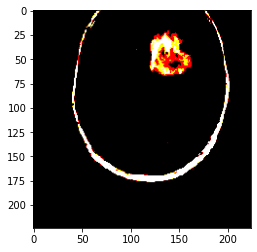

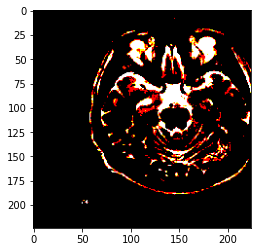

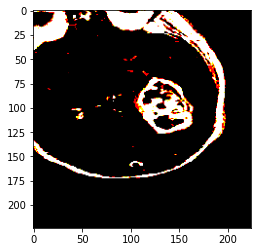

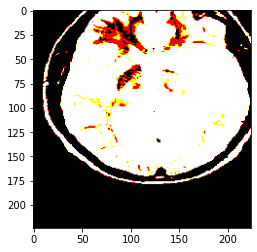

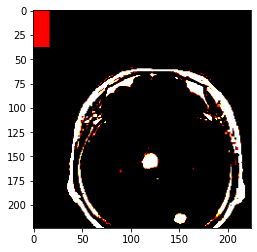

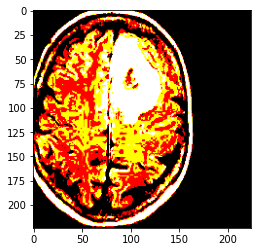

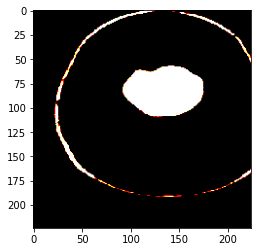

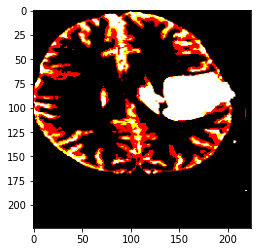

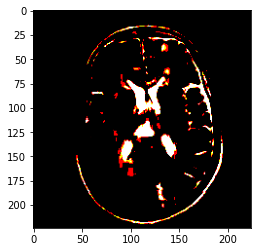

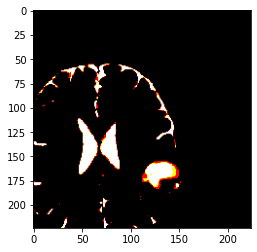

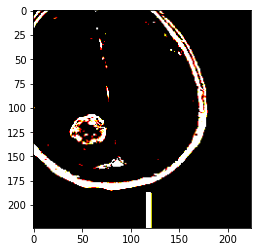

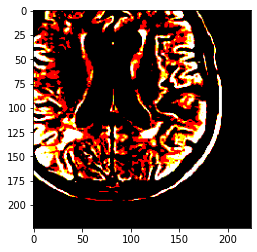

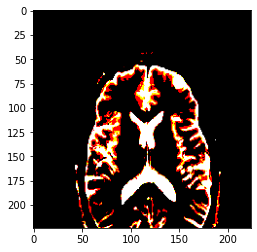

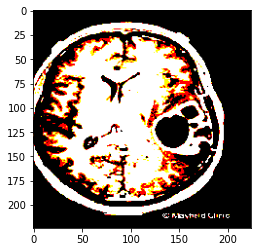

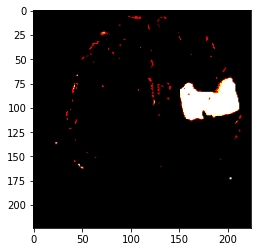

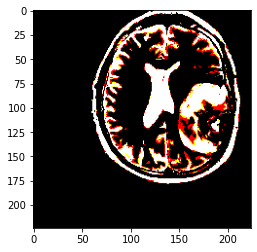

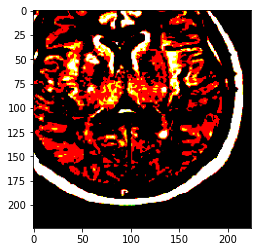

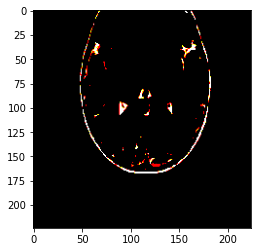

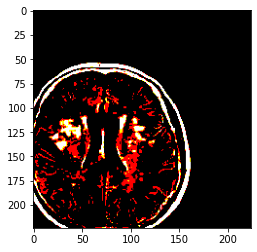

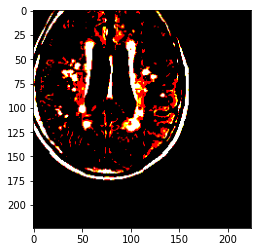

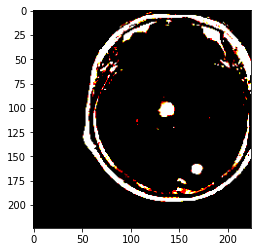

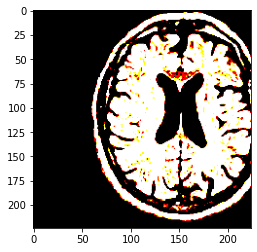

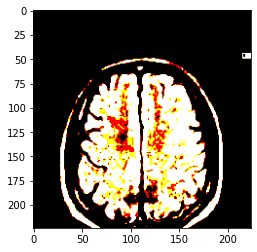

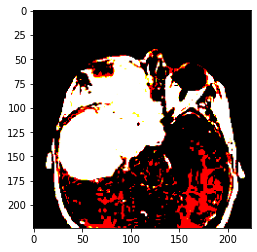

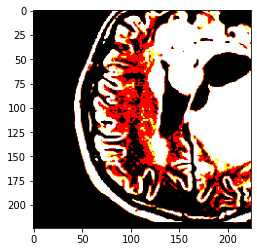

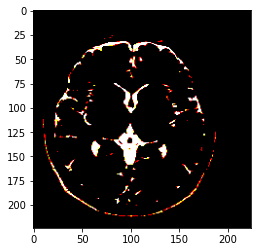

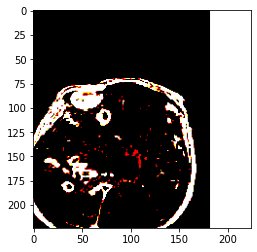

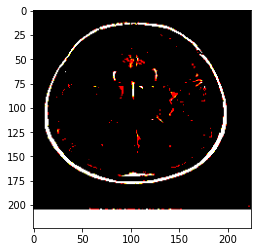

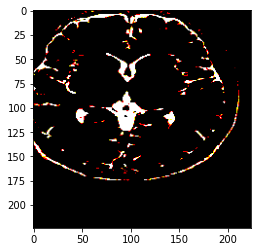

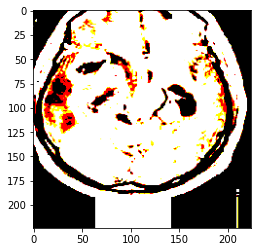

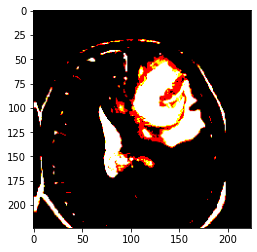

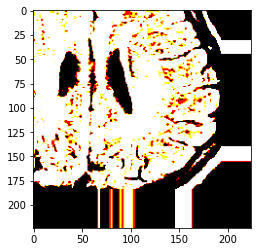

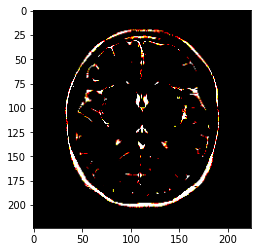

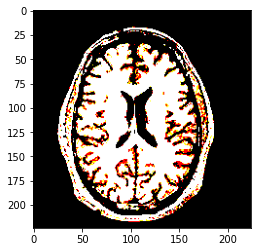

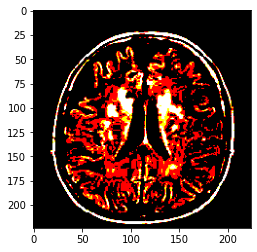

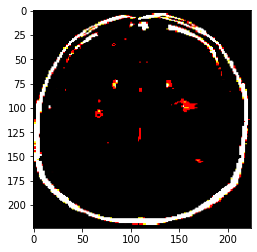

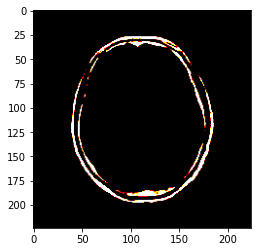

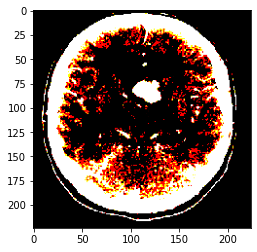

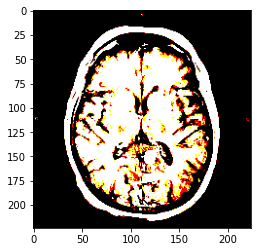

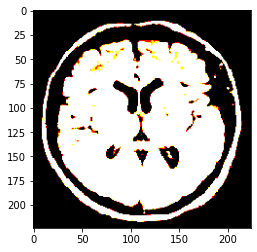

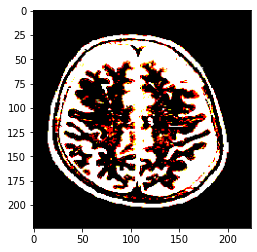

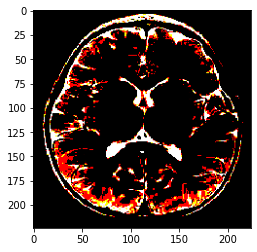

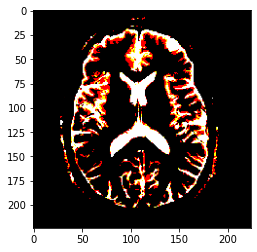

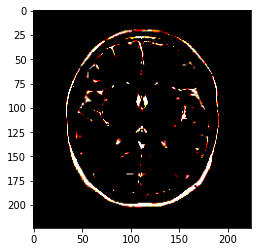

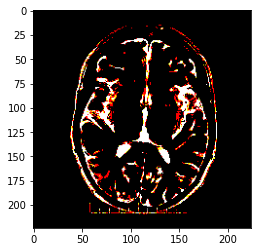

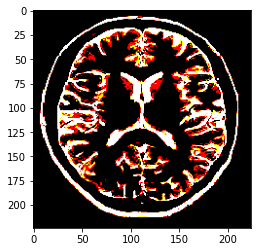

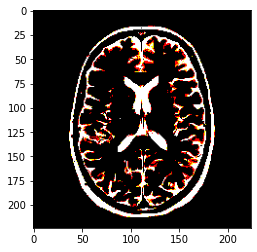

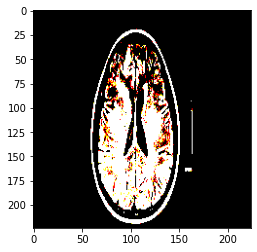

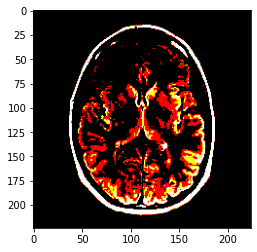

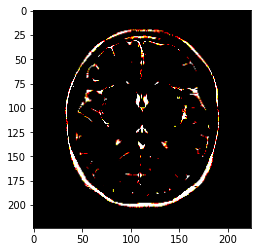

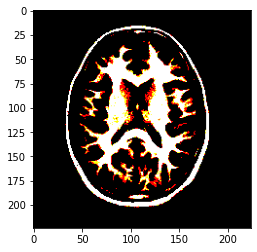

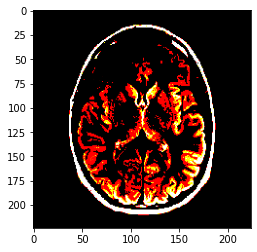

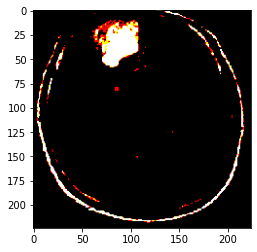

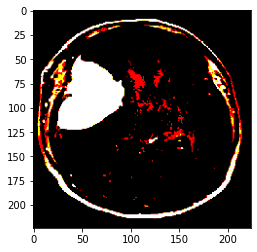

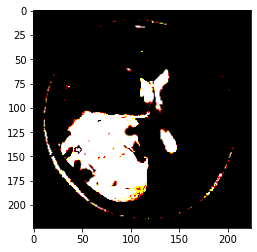

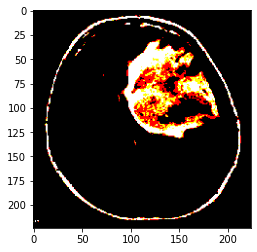

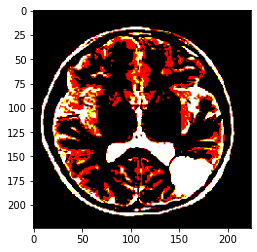

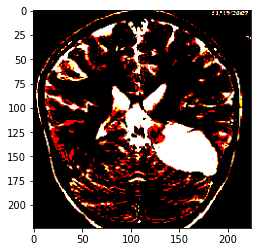

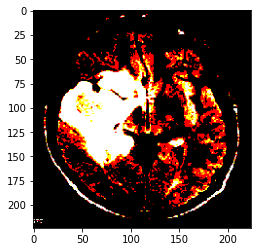

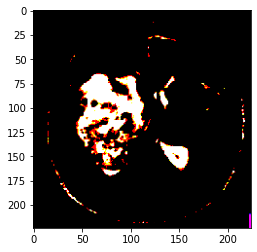

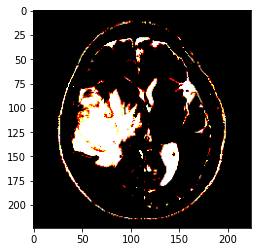

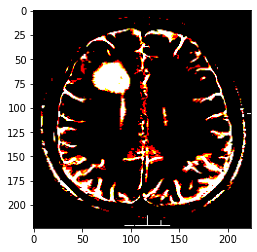

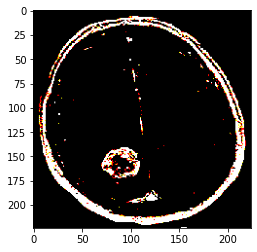

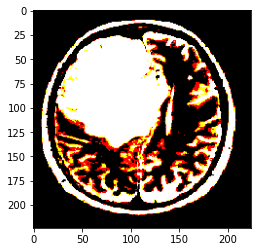

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen_0 = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,preprocessing_function=preprocess_input_0)
test_datagen_0 = ImageDataGenerator(preprocessing_function=preprocess_input_0)
validation_datagen_0 = ImageDataGenerator(preprocessing_function=preprocess_input_0)
train_generator_0 = train_datagen_0.flow_from_directory("/content/drive/MyDrive/brain_dataset/train",target_size=(224,224),batch_size=32,shuffle=True,class_mode='binary')
test_generator_0 = test_datagen_0.flow_from_directory("/content/drive/MyDrive/brain_dataset/test",target_size=(224,224),batch_size=32,shuffle=False,class_mode='binary')
validation_generator_0 = validation_datagen_0.flow_from_directory("/content/drive/MyDrive/brain_dataset/validation",target_size=(224,224),batch_size=32,shuffle=False,class_mode='binary')




x_batch, y_batch = next(train_generator_0)
for i in range (0,32):
    image = x_batch[i]
    plt.imshow(image)
    plt.show()

x_batch, y_batch = next(test_generator_0)
for i in range (0,32):

    image = x_batch[i]
    #np.squeeze(image)
    plt.imshow(image)
    plt.show()


Found 176 images belonging to 2 classes.
Found 51 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


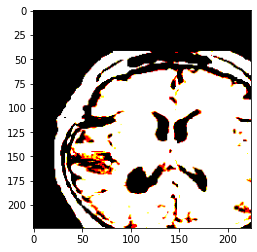

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


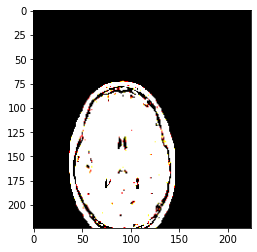

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


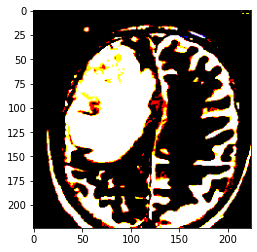

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


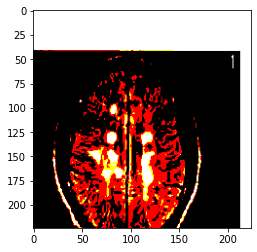

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


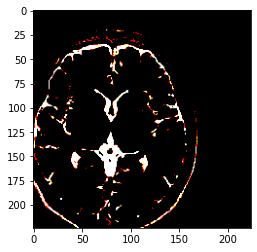

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


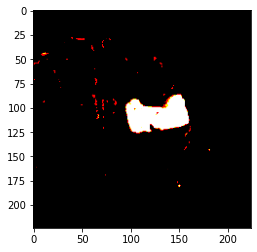

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


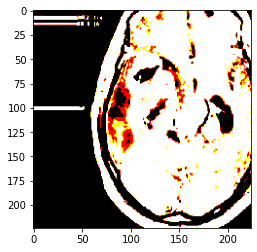

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


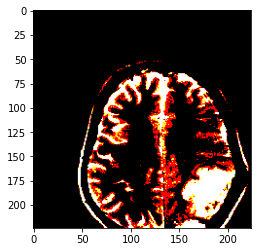

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


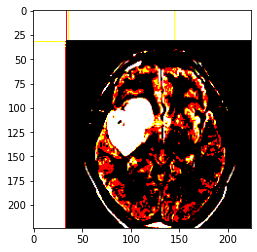

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


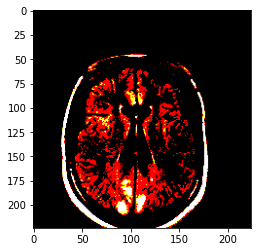

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


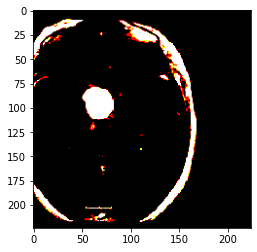

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


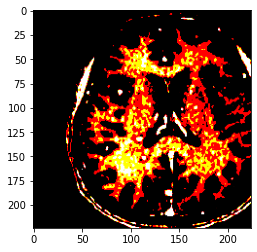

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


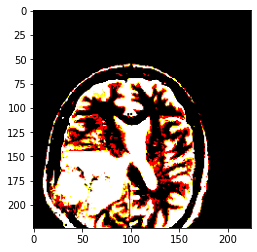

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


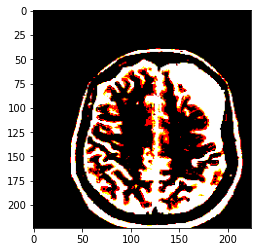

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


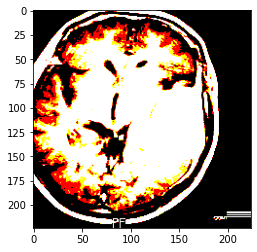

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


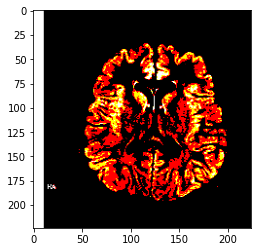

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


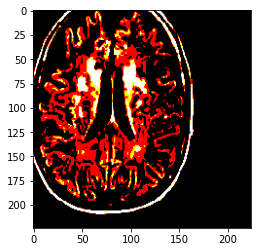

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


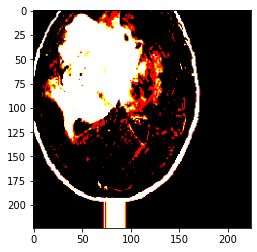

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


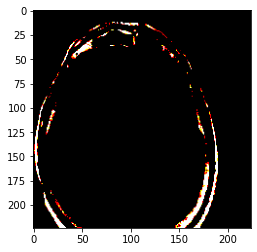

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


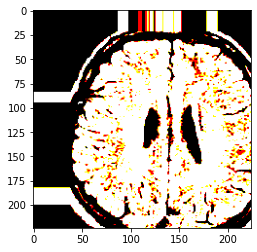

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


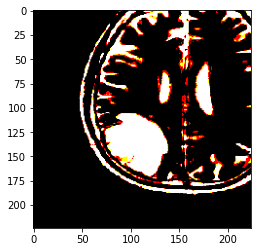

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


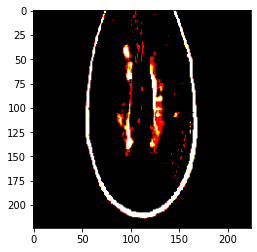

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


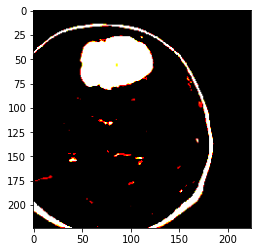

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


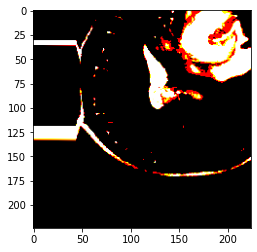

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


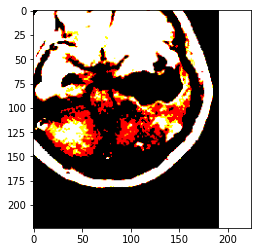

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


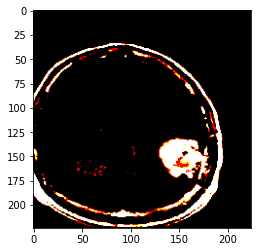

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


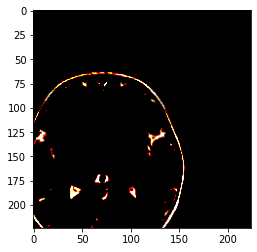

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


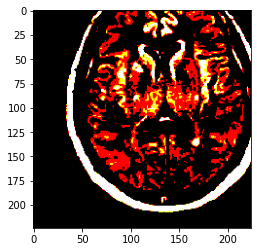

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


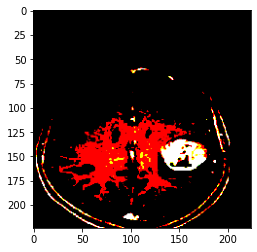

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


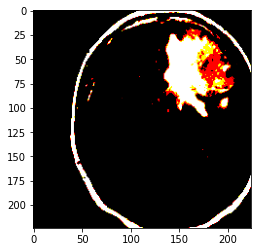

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


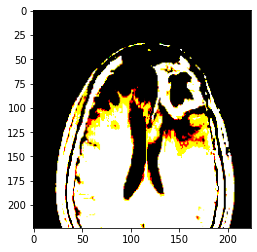

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


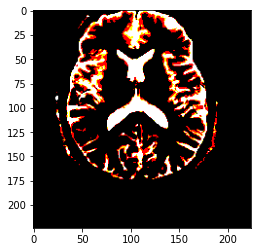

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


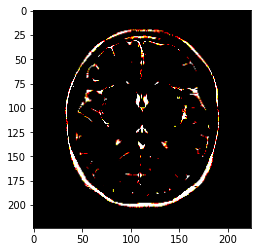

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


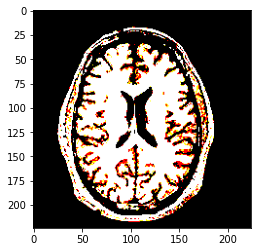

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


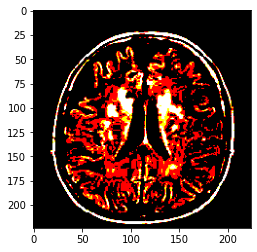

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


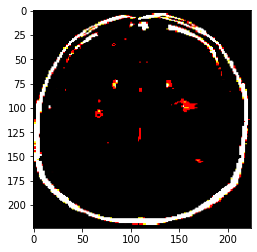

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


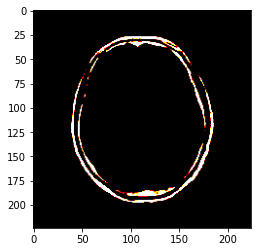

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


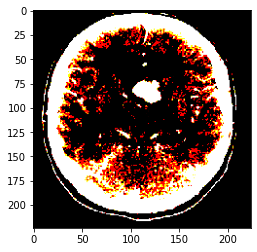

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


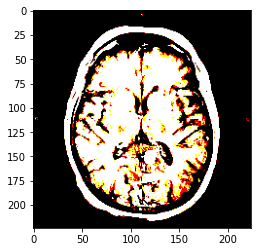

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


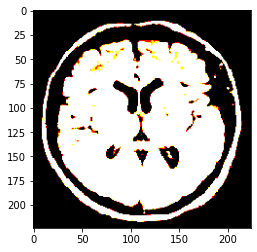

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


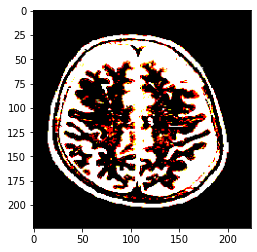

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


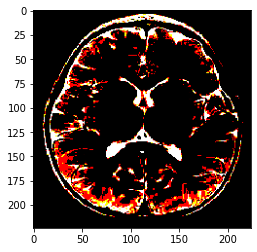

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


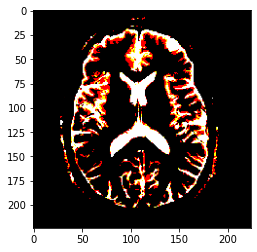

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


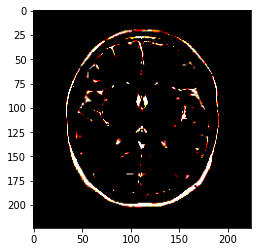

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


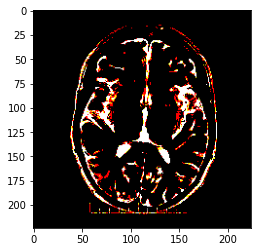

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


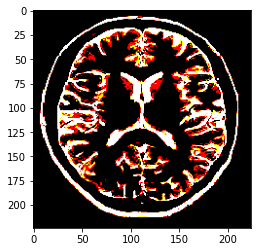

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


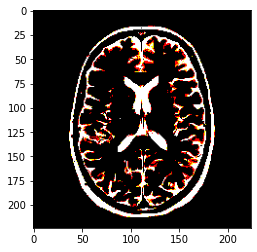

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


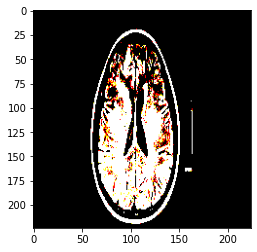

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


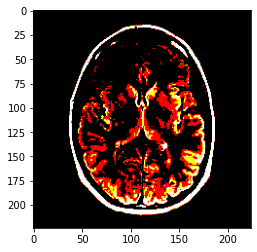

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


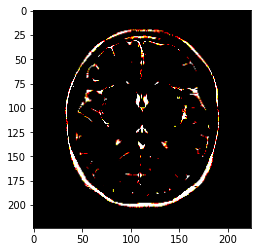

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


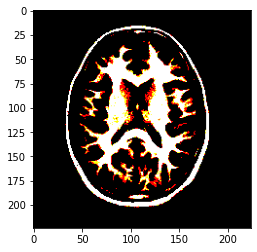

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


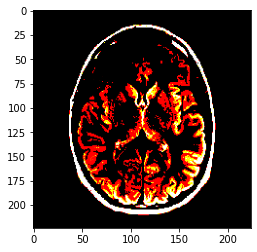

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


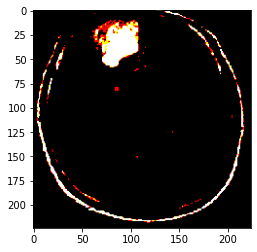

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


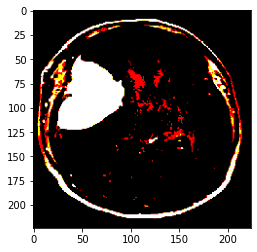

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


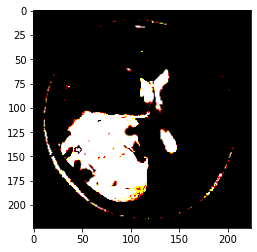

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


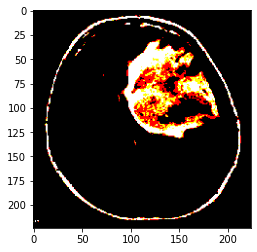

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


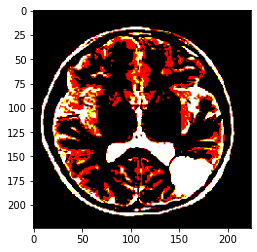

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


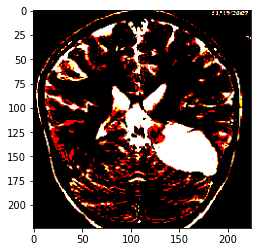

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


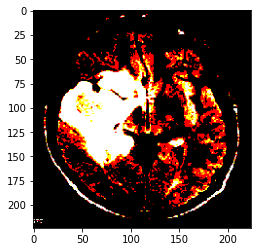

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


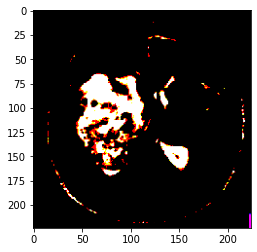

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


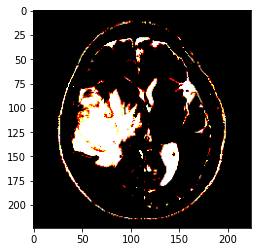

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


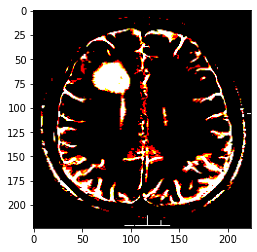

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


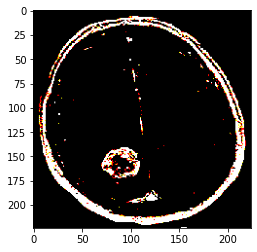

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


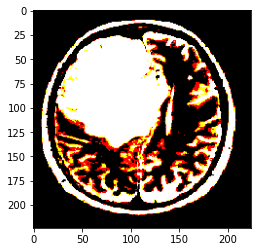

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen_1 = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,preprocessing_function=preprocess_input_1)
test_datagen_1 = ImageDataGenerator(preprocessing_function=preprocess_input_1)
validation_datagen_1 = ImageDataGenerator(preprocessing_function=preprocess_input_1)
train_generator_1 = train_datagen_1.flow_from_directory("/content/drive/MyDrive/brain_dataset/train",target_size=(224,224),batch_size=32,shuffle=True,class_mode='binary',color_mode='rgb')
test_generator_1 = test_datagen_1.flow_from_directory("/content/drive/MyDrive/brain_dataset/test",target_size=(224,224),batch_size=32,shuffle=False,class_mode='binary',color_mode='rgb')
validation_generator_1 = validation_datagen_1.flow_from_directory("/content/drive/MyDrive/brain_dataset/validation",target_size=(224,224),batch_size=32,shuffle=False,class_mode='binary',color_mode='rgb')




x_batch, y_batch = next(train_generator_1)
for i in range (0,32):
    image = x_batch[i]
    plt.imshow(image)
    plt.show()

x_batch, y_batch = next(test_generator_1)
for i in range (0,32):

    image = x_batch[i]
    #np.squeeze(image)
    plt.imshow(image)
    plt.show()


Found 176 images belonging to 2 classes.
Found 51 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


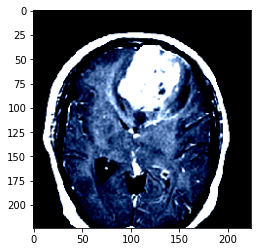

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


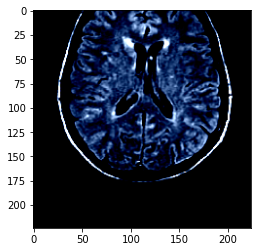

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


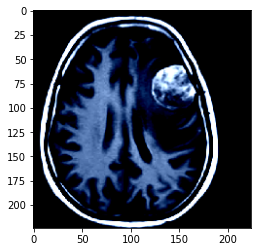

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


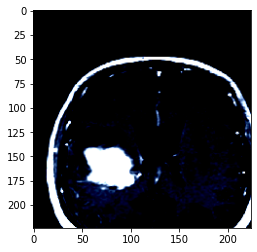

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


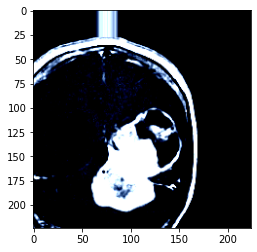

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


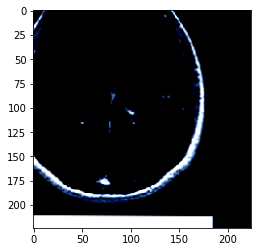

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


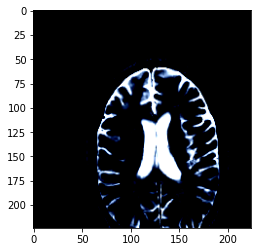

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


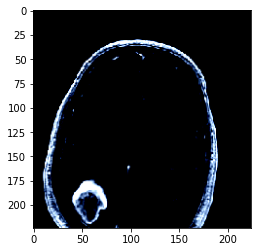

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


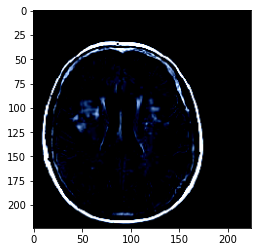

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


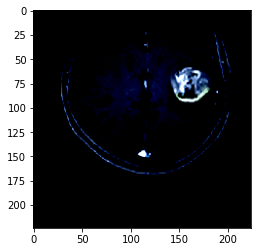

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


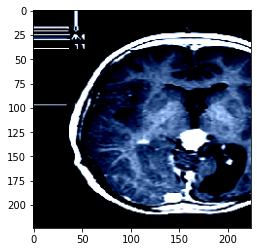

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


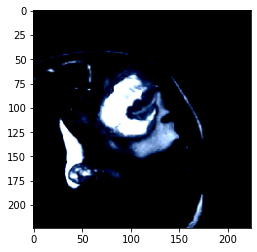

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


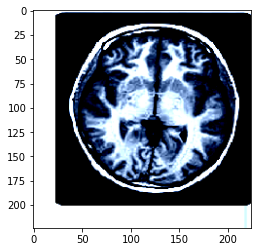

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


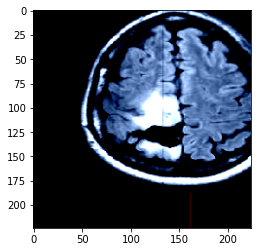

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


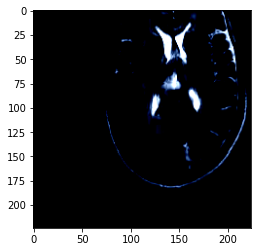

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


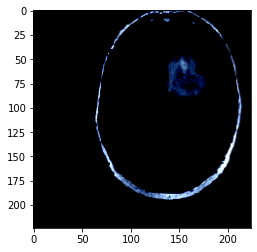

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


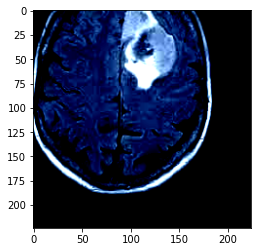

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


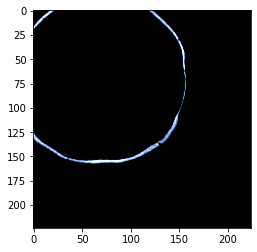

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


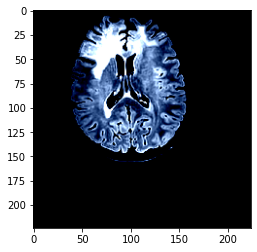

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


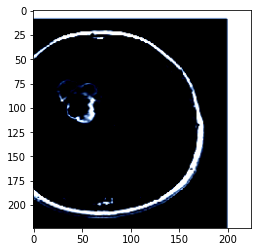

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


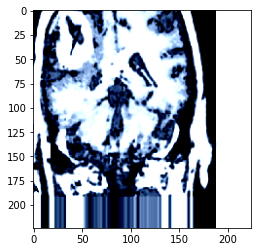

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


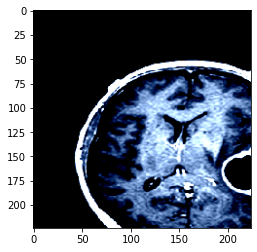

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


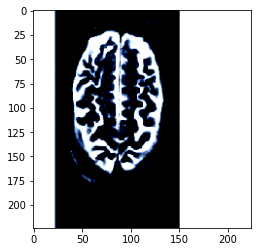

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


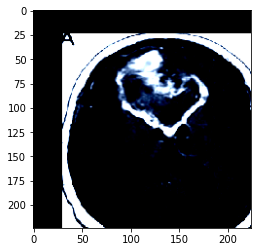

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


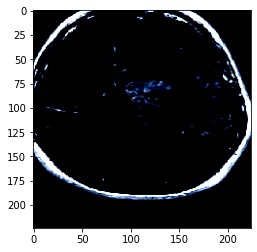

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


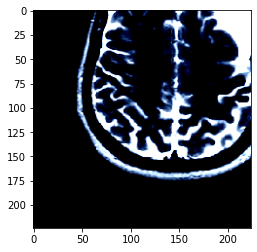

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


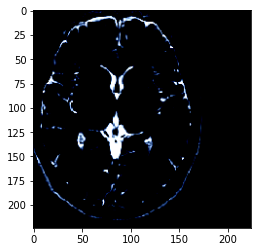

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


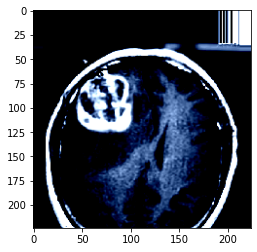

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


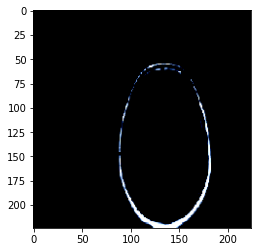

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


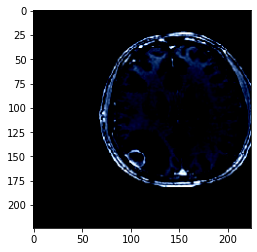

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


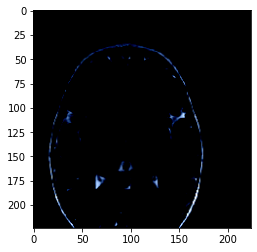

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


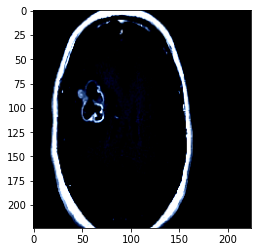

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


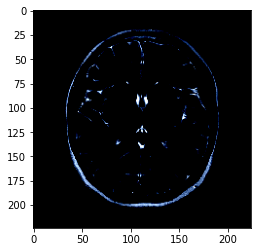

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


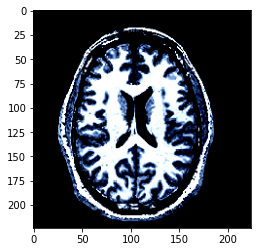

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


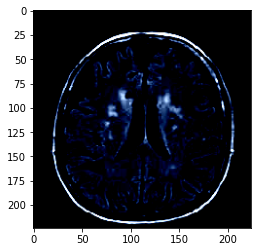

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


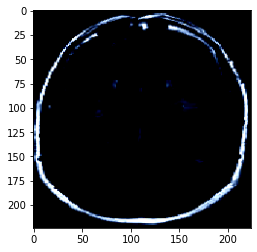

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


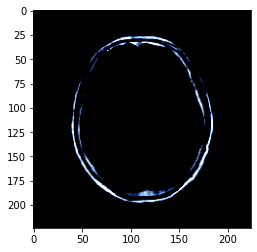

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


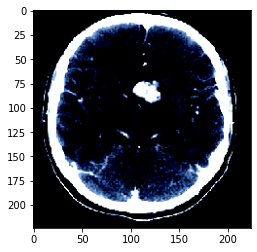

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


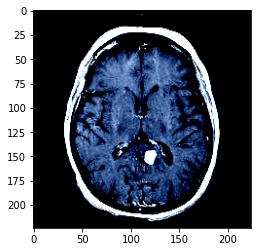

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


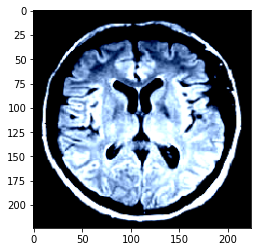

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


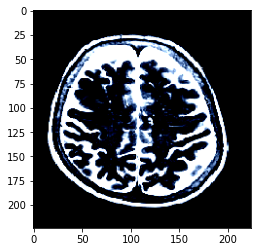

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


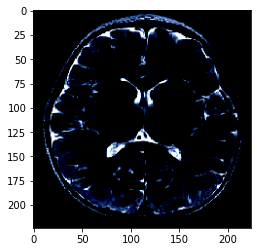

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


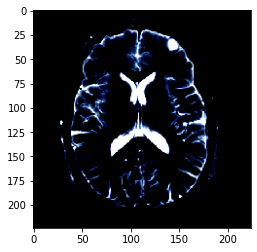

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


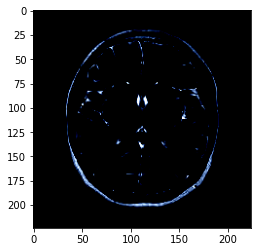

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


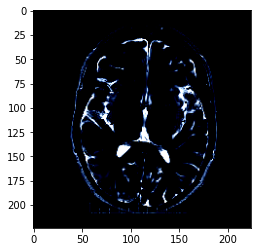

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


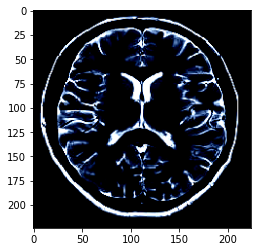

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


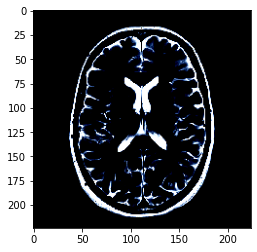

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


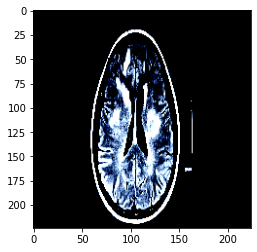

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


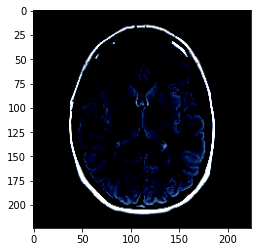

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


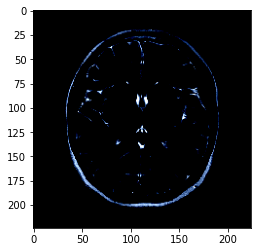

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


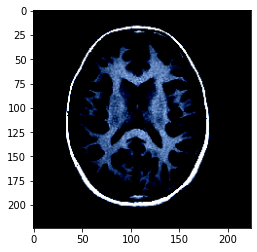

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


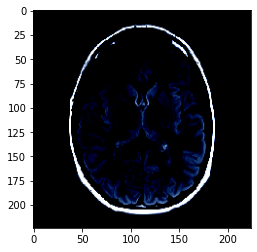

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


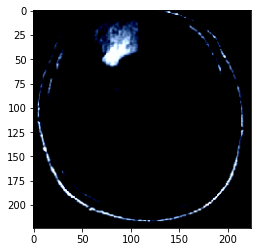

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


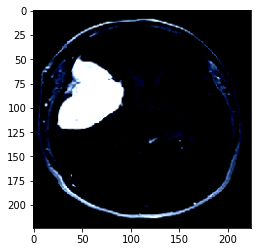

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


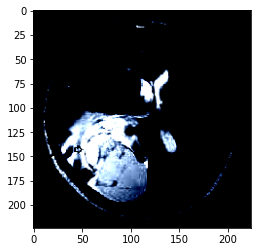

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


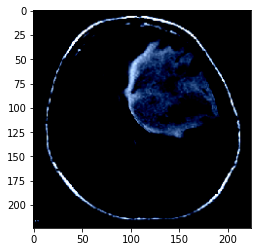

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


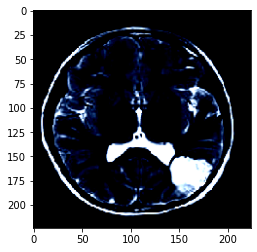

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


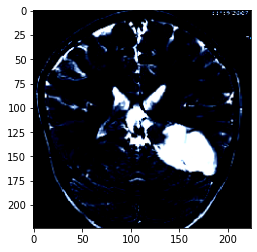

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


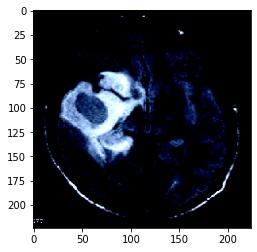

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


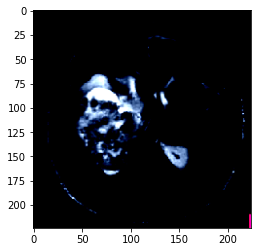

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


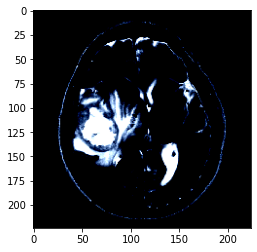

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


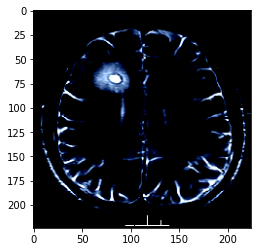

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


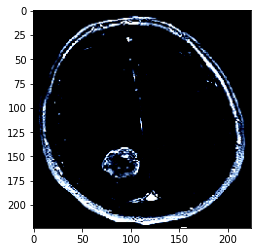

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


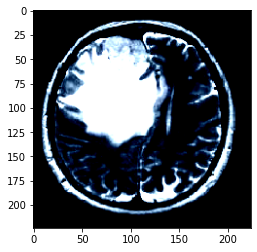

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen_2 = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,preprocessing_function=preprocess_input_2)
test_datagen_2 = ImageDataGenerator(preprocessing_function=preprocess_input_2)
validation_datagen_2 = ImageDataGenerator(preprocessing_function=preprocess_input_2)
train_generator_2 = train_datagen_2.flow_from_directory("/content/drive/MyDrive/brain_dataset/train",target_size=(224,224),batch_size=32,shuffle=True,class_mode='binary',color_mode='rgb')
test_generator_2 = test_datagen_2.flow_from_directory("/content/drive/MyDrive/brain_dataset/test",target_size=(224,224),batch_size=32,shuffle=False,class_mode='binary',color_mode='rgb')
validation_generator_2 = validation_datagen_2.flow_from_directory("/content/drive/MyDrive/brain_dataset/validation",target_size=(224,224),batch_size=32,shuffle=False,class_mode='binary',color_mode='rgb')




x_batch, y_batch = next(train_generator_2)
for i in range (0,32):
    image = x_batch[i]
    plt.imshow(image)
    plt.show()

x_batch, y_batch = next(test_generator_2)
for i in range (0,32):

    image = x_batch[i]
    #np.squeeze(image)
    plt.imshow(image)
    plt.show()


In [ ]:
from keras.layers import  Dropout
from keras.layers import  Flatten
from keras.layers import  Dense

x = Flatten()(model_0.output)
x = Dropout(0.5)(x)
x = Dense(1, activation = "sigmoid")(x)
model_0 = keras.Model(model_0.input, x)
model_0.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = "accuracy")
model_0.summary()


y = Flatten()(model_1.output)
y = Dropout(0.5)(y)
y = Dense(1, activation = "sigmoid")(y)
model_1 = keras.Model(model_1.input, y)
model_1.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = "accuracy")
model_1.summary()


z = Flatten()(model_2.output)
z = Dropout(0.5)(z)
z = Dense(1, activation = "sigmoid")(z)
model_2 = keras.Model(model_2.input, z)
model_2.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = "accuracy")
model_2.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
es_0=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)
mc_0 = ModelCheckpoint('/content/drive/MyDrive/model/model_00.h5', monitor='val_accuracy',save_best_only=True, mode='max')

In [ ]:
model_0.fit_generator(train_generator_0,validation_data=validation_generator_0,epochs=40,verbose=1,callbacks=[mc_0,es_0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/40
6/6 [==============================] - 84s 14s/step - loss: 8.3052 - accuracy: 0.4943 - val_loss: 5.7516 - val_accuracy: 0.4231
Epoch 2/40
6/6 [==============================] - 69s 12s/step - loss: 2.8543 - accuracy: 0.7159 - val_loss: 2.4496 - val_accuracy: 0.7692
Epoch 3/40
6/6 [==============================] - 65s 11s/step - loss: 1.8946 - accuracy: 0.8239 - val_loss: 2.5726 - val_accuracy: 0.7692
Epoch 4/40
6/6 [==============================] - 65s 11s/step - loss: 1.3817 - accuracy: 0.8466 - val_loss: 1.3064 - val_accuracy: 0.8462
Epoch 5/40
6/6 [==============================] - 72s 12s/step - loss: 1.1034 - accuracy: 0.8977 - val_loss: 1.0365 - val_accuracy: 0.8846
Epoch 6/40
6/6 [==============================] - 64s 11s/step - loss: 0.9993 - accuracy: 0.8750 - val_loss: 1.5644 - val_accuracy: 0.8077
Epoch 7/40
6/6 [==============================] - 68s 11s/step - loss: 0.6217 - accuracy: 0.9091 - val_loss: 0.8511 - val_accuracy: 0.9231
Epoch 8/40
6/6 [===========

In [ ]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
es_1=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)
mc_1 = ModelCheckpoint('/content/drive/MyDrive/model/model_01.h5', monitor='val_accuracy',save_best_only=True, mode='max')

In [ ]:
model_1.fit_generator(train_generator_1,validation_data=validation_generator_1,epochs=40,verbose=1,callbacks=[mc_1,es_1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/40
6/6 [==============================] - 138s 25s/step - loss: 3.7881 - accuracy: 0.6307 - val_loss: 1.1214 - val_accuracy: 0.8077
Epoch 2/40
6/6 [==============================] - 136s 23s/step - loss: 2.8201 - accuracy: 0.6932 - val_loss: 1.3272 - val_accuracy: 0.8077
Epoch 3/40
6/6 [==============================] - 136s 23s/step - loss: 2.1986 - accuracy: 0.7841 - val_loss: 1.0490 - val_accuracy: 0.8846
Epoch 4/40
6/6 [==============================] - 136s 23s/step - loss: 1.8342 - accuracy: 0.8295 - val_loss: 1.0014 - val_accuracy: 0.8462
Epoch 5/40
6/6 [==============================] - 135s 23s/step - loss: 1.2758 - accuracy: 0.8523 - val_loss: 0.8239 - val_accuracy: 0.8846
Epoch 6/40
6/6 [==============================] - 136s 23s/step - loss: 2.2982 - accuracy: 0.8182 - val_loss: 0.9459 - val_accuracy: 0.8846
Epoch 7/40
6/6 [==============================] - 139s 23s/step - loss: 1.6969 - accuracy: 0.8523 - val_loss: 1.1590 - val_accuracy: 0.9231
Epoch 8/40
6/6 [====

In [ ]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
es_2=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)
mc_2 = ModelCheckpoint('/content/drive/MyDrive/model/model_02.h5', monitor='val_accuracy',save_best_only=True, mode='max')

In [ ]:
model_2.fit_generator(train_generator_2,validation_data=validation_generator_2,epochs=40,verbose=1,callbacks=[mc_2,es_2])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/40
6/6 [==============================] - 46s 6s/step - loss: 3.7536 - accuracy: 0.5341 - val_loss: 1.0459 - val_accuracy: 0.6154
Epoch 2/40
6/6 [==============================] - 35s 6s/step - loss: 1.1670 - accuracy: 0.7443 - val_loss: 1.1675 - val_accuracy: 0.6923
Epoch 3/40
6/6 [==============================] - 37s 6s/step - loss: 0.9590 - accuracy: 0.7841 - val_loss: 1.0549 - val_accuracy: 0.8077
Epoch 4/40
6/6 [==============================] - 34s 6s/step - loss: 0.8286 - accuracy: 0.7841 - val_loss: 0.7559 - val_accuracy: 0.7308
Epoch 5/40
6/6 [==============================] - 35s 6s/step - loss: 0.6277 - accuracy: 0.8409 - val_loss: 0.6776 - val_accuracy: 0.8846
Epoch 6/40
6/6 [==============================] - 33s 6s/step - loss: 0.4437 - accuracy: 0.8750 - val_loss: 0.5648 - val_accuracy: 0.7692
Epoch 7/40
6/6 [==============================] - 35s 6s/step - loss: 0.5516 - accuracy: 0.8580 - val_loss: 0.8228 - val_accuracy: 0.8462
Epoch 8/40
6/6 [==================

In [ ]:
from tensorflow import keras
model_0 = keras.models.load_model('/content/drive/MyDrive/model/model_00.h5')

In [ ]:
from tensorflow import keras
model_1 = keras.models.load_model('/content/drive/MyDrive/model/model_01.h5')

In [ ]:
from tensorflow import keras
model_2 = keras.models.load_model('/content/drive/MyDrive/model/model_02.h5')

In [ ]:
import pandas as pd

from sklearn.metrics import classification_report,roc_curve,roc_auc_score,plot_roc_curve
y_true = test_generator_0.classes
y_scores = model_0.predict(test_generator_0)
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
T=optimal_threshold
y_pred = model_0.predict(test_generator_0)
y_pred_bool = y_scores>=T

filenames = test_generator_0.filenames
val_df = pd.DataFrame()
val_df['filename'] = filenames
val_df['actual'] = y_true
val_df['predicted_model_0'] = y_pred_bool


In [ ]:
 test_loss_0, test_acc_0 = model_0.evaluate(test_generator_0, steps=len(test_generator_0), verbose=1)
 print('Loss: %.3f' % (test_loss_0 * 100.0))
 print('Accuracy: %.3f' % (test_acc_0 * 100.0))

2/2 [==============================] - 18s 6s/step - loss: 1.5409 - accuracy: 0.8824
Loss: 154.089
Accuracy: 88.235


In [ ]:
from sklearn.metrics import classification_report,roc_curve,roc_auc_score,plot_roc_curve
y_true = test_generator_1.classes
y_scores = model_1.predict(test_generator_1)
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
T=optimal_threshold
y_pred = model_1.predict(test_generator_1)
y_pred_bool = y_scores>=T
val_df['predicted_model_1'] = y_pred_bool


In [ ]:
 test_loss_1, test_acc_1 = model_1.evaluate(test_generator_1, steps=len(test_generator_1), verbose=1)
 print('Loss: %.3f' % (test_loss_1 * 100.0))
 print('Accuracy: %.3f' % (test_acc_1 * 100.0))

2/2 [==============================] - 34s 13s/step - loss: 1.6050 - accuracy: 0.9412
Loss: 160.497
Accuracy: 94.118


In [ ]:
from sklearn.metrics import classification_report,roc_curve,roc_auc_score,plot_roc_curve
y_true = test_generator_2.classes
y_scores = model_2.predict(test_generator_2)
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
T=optimal_threshold
y_pred = model_2.predict(test_generator_2)
y_pred_bool = y_scores>=T
val_df['predicted_model_2'] = y_pred_bool

In [ ]:
 test_loss_2, test_acc_2 = model_2.evaluate(test_generator_2, steps=len(test_generator_2), verbose=1)
 print('Loss: %.3f' % (test_loss_2 * 100.0))
 print('Accuracy: %.3f' % (test_acc_2 * 100.0))

2/2 [==============================] - 13s 5s/step - loss: 0.5494 - accuracy: 0.8824
Loss: 54.937
Accuracy: 88.235


In [ ]:
val_df = val_df*1

In [ ]:
val_df['final_result'] = val_df['predicted_model_0'] + val_df['predicted_model_1'] +val_df['predicted_model_2']

In [ ]:
final = []
for row in val_df['final_result']:
  if row >=2:
    final.append(1)
  else:
    final.append(0)

val_df['final'] = final
del val_df['final_result']
print(val_df)

         filename  actual  predicted_model_0  predicted_model_1  \
0    no/1 no.jpeg       0                  0                  0   
1    no/25 no.jpg       0                  0                  0   
2    no/27 no.jpg       0                  0                  0   
3    no/34 no.jpg       0                  0                  0   
4   no/48 no.jpeg       0                  0                  0   
5       no/N1.JPG       0                  1                  1   
6      no/N15.jpg       0                  0                  0   
7       no/N2.JPG       0                  0                  0   
8      no/N26.JPG       0                  0                  1   
9       no/N5.jpg       0                  0                  0   
10    no/No17.jpg       0                  0                  0   
11    no/no 1.jpg       0                  0                  0   
12    no/no 3.jpg       0                  0                  0   
13    no/no 6.jpg       0                  1                  

In [ ]:
val_df.to_csv('/content/drive/MyDrive/ensemble.csv')

In [ ]:
from sklearn import metrics

print(metrics.classification_report(val_df['actual'],val_df['predicted_model_0']))
print(metrics.classification_report(val_df['actual'],val_df['predicted_model_1']))
print(metrics.classification_report(val_df['actual'],val_df['predicted_model_2']))
print("Classfiaction report after Ensemble")
print(metrics.classification_report(val_df['actual'],val_df['final']))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        20
           1       0.94      0.94      0.94        31

    accuracy                           0.92        51
   macro avg       0.92      0.92      0.92        51
weighted avg       0.92      0.92      0.92        51

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.94      0.97      0.95        31

    accuracy                           0.94        51
   macro avg       0.94      0.93      0.94        51
weighted avg       0.94      0.94      0.94        51

              precision    recall  f1-score   support

           0       0.94      0.80      0.86        20
           1       0.88      0.97      0.92        31

    accuracy                           0.90        51
   macro avg       0.91      0.88      0.89        51
weighted avg       0.91      0.90      0.90        51

Classfiaction repor

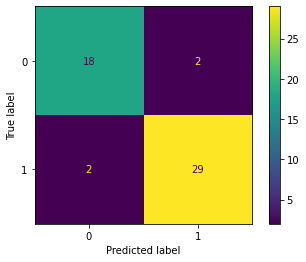

In [ ]:
import sklearn
cm = sklearn.metrics.confusion_matrix(val_df['actual'], val_df['predicted_model_0'],labels=None, sample_weight=None, normalize=None)
disp = sklearn.metrics.ConfusionMatrixDisplay(cm,display_labels=None)
disp.plot()
plt.show()

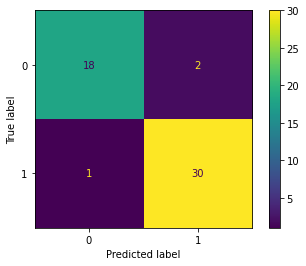

In [ ]:
cm = sklearn.metrics.confusion_matrix(val_df['actual'], val_df['predicted_model_1'],labels=None, sample_weight=None, normalize=None)
disp = sklearn.metrics.ConfusionMatrixDisplay(cm,display_labels=None)
disp.plot()
plt.show()

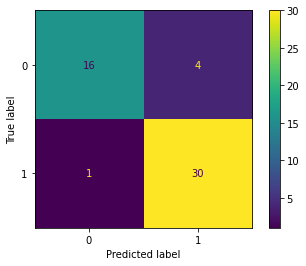

In [ ]:
cm = sklearn.metrics.confusion_matrix(val_df['actual'], val_df['predicted_model_2'],labels=None, sample_weight=None, normalize=None)
disp = sklearn.metrics.ConfusionMatrixDisplay(cm,display_labels=None)
disp.plot()
plt.show()

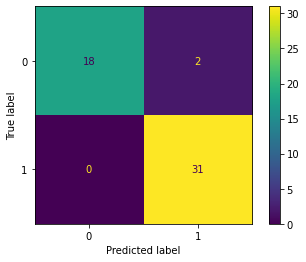

In [ ]:
cm = sklearn.metrics.confusion_matrix(val_df['actual'], val_df['final'],labels=None, sample_weight=None, normalize=None)
disp = sklearn.metrics.ConfusionMatrixDisplay(cm,display_labels=None)
disp.plot()
plt.show()